In [1]:
#import the needed librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set()
from sklearn.cluster import KMeans

In [31]:
#Now let's get and put the data in  pandas dataframe

order_products_train = pd.read_csv('data/order_products.csv')

orders = pd.read_csv('data/orders.csv')
products = pd.read_csv('data/products.csv')
aisles = pd.read_csv('data/aisles.csv')
departments = pd.read_csv('data/departments.csv')

In [32]:
data1 = pd.merge(order_products_train, orders, on = "order_id", how = "left")

In [33]:
data2 = pd.merge(data1, products, on = "product_id", how = "left")

In [34]:
data3 = pd.merge(data2, aisles, on = "aisle_id", how = "left")

In [35]:
data3.head(10)

,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle
0,2,33120,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,eggs
1,2,28985,2,202279,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,202279,3,5,9,8.0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,202279,3,5,9,8.0,Coconut Butter,19,13,oils vinegars
4,2,30035,5,202279,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients
5,2,17794,6,202279,3,5,9,8.0,Carrots,83,4,fresh vegetables
6,2,40141,7,202279,3,5,9,8.0,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes
7,2,1819,8,202279,3,5,9,8.0,All Natural No Stir Creamy Almond Butter,88,13,spreads
8,2,43668,9,202279,3,5,9,8.0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits
9,3,33754,1,205970,16,5,17,12.0,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt


In [6]:
data3.shape

(33819106, 12)

In [9]:
from random import sample 
data3=data3.sample(n=1690000)

In [57]:
data = pd.pivot_table(data3, index="user_id", columns="aisle",values="order_id", aggfunc=np.size)
data.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,3.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,42.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
5,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
8,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,6.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,28.0


In [58]:
data[data.notnull()] = 1
data

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
5,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
206206,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
206207,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0


In [59]:
data = data.fillna(0)
data.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [9]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(data)
x_scaled

array([[-0.22023299, -0.62324566, -0.13254177, ..., -0.99619074,
        -0.18060937,  0.78838308],
       [-0.22023299,  1.60450376, -0.13254177, ...,  1.00382383,
        -0.18060937,  0.78838308],
       [-0.22023299, -0.62324566, -0.13254177, ...,  1.00382383,
        -0.18060937, -1.26841891],
       ...,
       [-0.22023299, -0.62324566, -0.13254177, ...,  1.00382383,
        -0.18060937,  0.78838308],
       [-0.22023299,  1.60450376, -0.13254177, ..., -0.99619074,
        -0.18060937,  0.78838308],
       [-0.22023299,  1.60450376, -0.13254177, ..., -0.99619074,
        -0.18060937,  0.78838308]])

In [109]:
data_log = np.log(data)
data_log.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693147
2,NaN,1.098612,NaN,NaN,NaN,NaN,0.693147,NaN,NaN,NaN,...,1.098612,0.0,0.0,NaN,NaN,NaN,NaN,0.693147,NaN,3.737670
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.386294,0.0,NaN,NaN,NaN,NaN,NaN,0.693147,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.000000,NaN,NaN
5,0.0,1.386294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.098612


In [110]:
data_log = data_log.fillna(0)
data_log.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.693147
2,0.0,1.098612,0.0,0.0,0.000000,0.0,0.693147,0.0,0.0,0.0,...,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,3.737670
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,1.386294,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
5,0.0,1.386294,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.098612
6,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
7,0.0,0.000000,0.0,0.0,0.000000,0.0,1.098612,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.609438
8,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
9,0.0,0.000000,0.0,0.0,1.791759,0.0,0.693147,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.0,3.332205


In [39]:
data_log = data

In [11]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(data_log)
    wcss.append(kmeans.inertia_)
wcss

[3744650.5119660157,
 3351433.7464459836,
 3248090.4389467407,
 3201186.9033369725,
 3159843.670276938,
 3135989.453881046,
 3112932.8624299676,
 3094407.508952858,
 3079026.325811608]

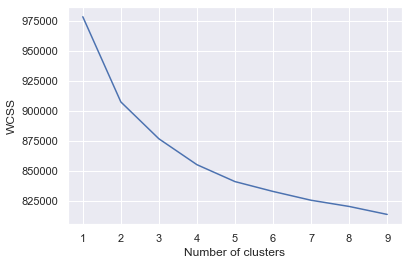

In [16]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=6)

kmeans.fit(data_log)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

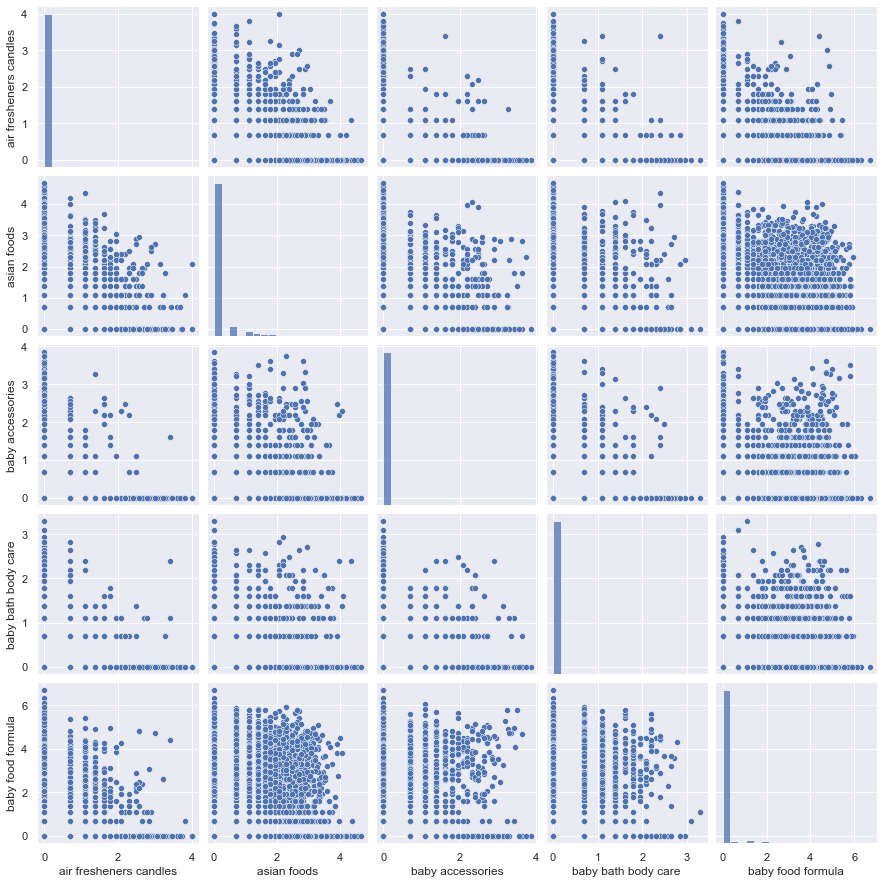

In [21]:
sns.pairplot(data_log.iloc[:,range(5)])

In [40]:
## to do PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_data_log=pca.fit_transform(data_log)
new_data_log.shape

(206209, 2)

In [23]:
## to do get PC1 and PC2 into principal_breast_Df
principal_new_data_log = pd.DataFrame(new_data_log)
principal_new_data_log.columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10']

In [31]:
principal_new_data_log.tail()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
206204,-1.463837,-0.142928,0.679343,-2.099773,-0.166088,0.262919,0.043046,0.442596,-0.210416,0.018066
206205,2.867106,1.535485,-1.608519,2.465227,0.501570,-0.913437,-0.595314,-3.367122,-1.175621,-1.340081
206206,3.838414,0.004784,0.780952,-0.519271,-0.781458,0.015059,-0.784319,1.394191,-0.487425,0.342682
206207,9.770045,0.137351,-0.727684,-1.398082,0.681120,1.483380,2.012317,-0.732555,0.289789,2.502403
206208,0.523036,1.177429,0.473868,-0.876427,0.576844,0.530557,1.902247,0.670277,0.658746,0.796843


In [14]:
pca.explained_variance_ratio_

array([0.15258322, 0.03460508])

In [24]:
## to do PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_data_log=pca.fit_transform(data_log)
new_data_log.shape

(206209, 2)

In [15]:
## to do get PC1 and PC2 into principal_breast_Df
principal_new_data_log = pd.DataFrame(new_data_log)
principal_new_data_log.columns = ['pc1','pc2']

In [16]:
pca.explained_variance_ratio_

array([0.15258322, 0.03460508])

In [23]:
principal_new_data_log.tail()

,pc1,pc2
188290,-0.207955,0.033248
188291,0.573701,-0.078345
188292,-0.030589,0.803723
188293,1.589757,0.887776
188294,-0.255311,0.562596


In [17]:
kmeans = KMeans(n_clusters=6)

kmeans.fit(principal_new_data_log)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
labels = kmeans.predict(principal_new_data_log)
centroids = kmeans.cluster_centers_

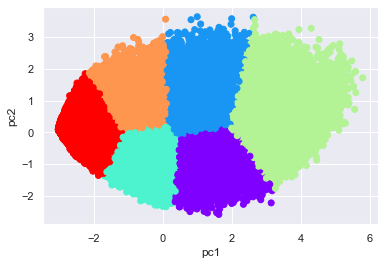

In [19]:
plt.scatter(principal_new_data_log['pc1'], principal_new_data_log['pc2'], c=labels, cmap='rainbow')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

In [30]:
data

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator
user_id,,,,,,,,,,,,,,,,,,,,,


In [23]:
labels

array([5, 1, 4, ..., 0, 3, 1], dtype=int32)

In [41]:
labels.shape


(206209, 1)

In [28]:
labels =  pd.DataFrame(labels)
labels.shape

(206209, 1)

In [27]:
data_log['indicator'] = labels[0]



In [25]:
data_log.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5


In [22]:

data = data_log[data_log['indicator'] == 0]
data

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator
user_id,,,,,,,,,,,,,,,,,,,,,


In [47]:
data.to_csv("group0.csv",index=False,sep=',')

In [34]:
# Add grand total columns, summing across all other columns
data['Grand Total'] = data.sum(axis=1)
data.columns.name = None
data.index.name = None

# Add the grand total row, summing all values in a column
data.loc['Grand Total', :] = data.sum()

/Users/jinhou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jinhou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [50]:
data.tail()

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator,Grand Total
206172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,...,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,7.454720e+00
206184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,8.995165e+00
206185,0.000000,0.000000,0.693147,0.000000,2.890372,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.320349e+01
206188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.0,2.007950e+01
Grand Total,1121.317227,10570.350361,434.860498,472.315662,12044.610722,2062.586114,20875.063417,1197.620677,259.936124,2260.884998,...,7122.471449,12308.476447,2130.762118,1776.864727,2610.594596,38475.721916,1625.618695,57188.356072,0.0,1.598222e+06


In [59]:
date_t0=data.iloc[-1:].reset_index()

In [60]:
date_t0=date_t0.iloc[:,1:]
date_t0

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator,Grand Total
0,301.0,2345.0,110.0,110.0,2809.0,486.0,4318.0,341.0,98.0,497.0,...,1550.0,2647.0,492.0,523.0,628.0,8412.0,349.0,12632.0,0.0,350081.0


In [61]:
date_t0 = date_t0.T
date_t0

,0
air fresheners candles,301.0
asian foods,2345.0
baby accessories,110.0
baby bath body care,110.0
baby food formula,2809.0
...,...
water seltzer sparkling water,8412.0
white wines,349.0
yogurt,12632.0
indicator,0.0


In [62]:
date_t0.sort_values(by=[0],ascending=False,inplace=True,)
date_t0

,0
Grand Total,350081.0
fresh fruits,25380.0
fresh vegetables,23201.0
packaged vegetables fruits,16754.0
yogurt,12632.0
...,...
baby accessories,110.0
eye ear care,102.0
beauty,98.0
frozen juice,76.0


In [47]:

data1 = data_log[data_log['indicator'] == 5]
data1

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator
user_id,,,,,,,,,,,,,,,,,,,,,
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
188280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
188281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0


In [48]:
# Add grand total columns, summing across all other columns
data1['Grand Total'] = data1.sum(axis=1)
data1.columns.name = None
data1.index.name = None

# Add the grand total row, summing all values in a column
data1.loc['Grand Total', :] = data1.sum()

/Users/jinhou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jinhou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [54]:
data1.to_csv("group1.csv",index=False,sep=',')

In [49]:
data1

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator,Grand Total
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,15.0
13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,9.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,17.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,8.0
188281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,15.0
188287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,12.0
188290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,9.0


In [59]:
labels = data1.columns.values.tolist()
labels

['air fresheners candles',
 'asian foods',
 'baby accessories',
 'baby bath body care',
 'baby food formula',
 'bakery desserts',
 'baking ingredients',
 'baking supplies decor',
 'beauty',
 'beers coolers',
 'body lotions soap',
 'bread',
 'breakfast bakery',
 'breakfast bars pastries',
 'bulk dried fruits vegetables',
 'bulk grains rice dried goods',
 'buns rolls',
 'butter',
 'candy chocolate',
 'canned fruit applesauce',
 'canned jarred vegetables',
 'canned meals beans',
 'canned meat seafood',
 'cat food care',
 'cereal',
 'chips pretzels',
 'cleaning products',
 'cocoa drink mixes',
 'coffee',
 'cold flu allergy',
 'condiments',
 'cookies cakes',
 'crackers',
 'cream',
 'deodorants',
 'diapers wipes',
 'digestion',
 'dish detergents',
 'dog food care',
 'doughs gelatins bake mixes',
 'dry pasta',
 'eggs',
 'energy granola bars',
 'energy sports drinks',
 'eye ear care',
 'facial care',
 'feminine care',
 'first aid',
 'food storage',
 'fresh dips tapenades',
 'fresh fruits',
 'f

In [60]:
data1.iloc[-1:]

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator,Grand Total
Grand Total,275.470104,2559.466488,93.888492,92.138716,2878.624879,527.238511,4920.656606,278.910695,50.536334,540.170652,...,1724.590521,2819.946032,505.155083,413.543186,671.359943,9211.723446,352.683923,13520.601751,12772.0,390776.7225


In [50]:
date_temp=data1.iloc[-1:].reset_index()

In [51]:
date_temp

,index,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator,Grand Total
0,Grand Total,166.0,1460.0,77.0,93.0,1859.0,332.0,2726.0,237.0,51.0,...,968.0,1661.0,327.0,300.0,430.0,5405.0,232.0,8222.0,187275.0,412653.0


In [52]:
date_temp=date_temp.iloc[:,1:]
date_temp

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator,Grand Total
0,166.0,1460.0,77.0,93.0,1859.0,332.0,2726.0,237.0,51.0,285.0,...,968.0,1661.0,327.0,300.0,430.0,5405.0,232.0,8222.0,187275.0,412653.0


In [53]:
date_temp = date_temp.T
date_temp

,0
air fresheners candles,166.0
asian foods,1460.0
baby accessories,77.0
baby bath body care,93.0
baby food formula,1859.0
...,...
water seltzer sparkling water,5405.0
white wines,232.0
yogurt,8222.0
indicator,187275.0


In [54]:
date_temp.sort_values(by=[0],ascending=False,inplace=True,)
date_temp

,0
Grand Total,412653.0
indicator,187275.0
fresh fruits,16244.0
fresh vegetables,14931.0
packaged vegetables fruits,10819.0
...,...
baby bath body care,93.0
specialty wines champagnes,89.0
baby accessories,77.0
frozen juice,53.0


<BarContainer object of 136 artists>

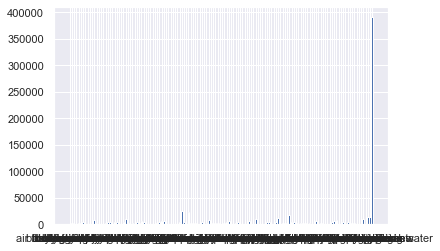

In [71]:
import matplotlib.pyplot as plt
 
name_list = labels
num_list = date_temp[0]
plt.bar(range(len(num_list)), num_list,tick_label=name_list)


In [80]:

data2 = data_log[data_log['indicator'] == 2]
data2

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator
user_id,,,,,,,,,,,,,,,,,,,,,
6,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,2.0
27,0.000000,1.386294,0.0,0.0,0.000000,0.0,0.693147,0.00000,0.0,0.000000,...,2.708050,0.000000,0.000000,0.0,0.0,0.0,4.532599,0.0,5.081404,2.0
34,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.609438,2.0
36,0.000000,2.639057,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,3.367296,...,0.000000,1.386294,0.000000,0.0,0.0,0.0,2.772589,0.0,1.098612,2.0
42,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,...,0.693147,0.000000,0.000000,0.0,0.0,0.0,1.386294,0.0,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206165,1.791759,1.098612,0.0,0.0,0.000000,0.0,0.693147,2.70805,0.0,0.000000,...,0.693147,1.098612,2.302585,0.0,0.0,0.0,2.397895,0.0,2.397895,2.0
206182,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.386294,2.0
206192,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,2.0


In [81]:
# Add grand total columns, summing across all other columns
data2['Grand Total'] = data2.sum(axis=1)
data2.columns.name = None
data2.index.name = None

# Add the grand total row, summing all values in a column
data2.loc['Grand Total', :] = data2.sum()

/Users/jinhou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jinhou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [82]:
data2

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator,Grand Total
6,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,5.465736
27,0.000000,1.386294,0.000000,0.00000,0.000000,0.000000,0.693147,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.532599,0.000000,5.081404,2.0,75.442192
34,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438,2.0,10.946375
36,0.000000,2.639057,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,3.367296,...,1.386294,0.000000,0.000000,0.000000,0.000000,2.772589,0.000000,1.098612,2.0,31.499991
42,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,2.0,35.993496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206182,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,2.0,30.927663
206192,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,29.228841
206199,0.000000,0.000000,0.000000,0.00000,1.098612,0.000000,0.693147,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.000000,3.891820,2.0,69.988959
206206,0.000000,1.386294,0.000000,0.00000,0.000000,0.000000,1.386294,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,61.392454


In [84]:
date_temp1=data2.iloc[-1:].reset_index()
date_temp1

,index,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator,Grand Total
0,Grand Total,495.084385,4717.887203,197.471708,230.70673,5541.245459,890.298078,8985.801407,522.927117,125.01737,...,3116.6497,5302.337953,894.884512,724.383984,1209.951606,17141.232365,757.895622,24804.044498,46808.0,743038.693882


In [86]:
date_temp1=date_temp1.iloc[:,1:]

date_temp1 = date_temp1.T
date_temp1

,0
air fresheners candles,495.084385
asian foods,4717.887203
baby accessories,197.471708
baby bath body care,230.706730
baby food formula,5541.245459
...,...
water seltzer sparkling water,17141.232365
white wines,757.895622
yogurt,24804.044498
indicator,46808.000000


In [87]:
date_temp1.sort_values(by=[0],ascending=False,inplace=True,)
date_temp1

,0
Grand Total,743038.693882
fresh fruits,46864.509229
indicator,46808.000000
fresh vegetables,42480.261318
packaged vegetables fruits,32675.690963
...,...
baby accessories,197.471708
eye ear care,185.680776
beauty,125.017370
frozen juice,119.864991


In [88]:
data['Grand Total'] = data1.sum(axis=1)
data.columns.name = None
data.index.name = None

# Add the grand total row, summing all values in a column
data.loc['Grand Total', :] = data.sum()
data

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator,Grand Total
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.00000,0.000000,0.0,NaN
5,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.098612,0.0,NaN
14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,NaN
19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.098612,0.000000,0.000000,1.098612,0.000000,0.00000,1.609438,0.0,NaN
22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.00000,0.693147,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,...,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,NaN
206184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,NaN
206185,0.000000,0.000000,0.693147,0.000000,2.890372,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,NaN
206188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.693147,0.0,NaN


In [89]:
date_temp0=data.iloc[-1:].reset_index()

In [90]:
date_temp0=date_temp0.iloc[:,1:]

date_temp0 = date_temp0.T
date_temp0

,0
air fresheners candles,2242.634454
asian foods,21140.700723
baby accessories,869.720995
baby bath body care,944.631324
baby food formula,24089.221444
...,...
water seltzer sparkling water,76951.443831
white wines,3251.237390
yogurt,114376.712144
indicator,0.000000


In [91]:
date_temp0.sort_values(by=[0],ascending=False,inplace=True,)
date_temp0

,0
Grand Total,781553.445001
fresh fruits,216733.803926
fresh vegetables,197210.905262
packaged vegetables fruits,151121.576094
yogurt,114376.712144
...,...
eye ear care,776.281834
kitchen supplies,769.000768
frozen juice,579.279088
beauty,519.872247


In [96]:
data3['Grand Total'] = data3.sum(axis=1)
data3.columns.name = None
data3.index.name = None

# Add the grand total row, summing all values in a column
data3.loc['Grand Total', :] = data3.sum()
data3

/Users/jinhou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jinhou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator,Grand Total
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,5.484907e+00
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438,3.0,4.392965e+01
11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,...,1.791759,0.000000,0.000000,0.000000,0.000000,2.302585,0.000000,2.302585,3.0,2.730210e+01
12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,1.717855e+01
17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.564949,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.583519,3.465736,1.791759,3.0,5.636263e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206194,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.693147,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,0.000000,0.000000,3.0,3.357917e+01
206197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,3.556202e+01
206203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,...,0.000000,0.693147,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,3.0,3.293212e+01
206204,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,3.0,1.623546e+01


In [92]:

data3 = data_log[data_log['indicator'] == 3]
data3

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator
user_id,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.0
7,0.0,0.000000,0.0,0.0,0.000000,0.0,1.098612,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.609438,3.0
11,0.0,0.000000,0.0,0.0,0.000000,0.0,1.386294,0.0,0.0,0.0,...,0.000000,1.791759,0.000000,0.0,0.0,0.0,2.302585,0.000000,2.302585,3.0
12,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.0
17,0.0,0.000000,0.0,0.0,0.000000,0.0,2.564949,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,3.583519,3.465736,1.791759,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206189,0.0,1.098612,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.945910,0.000000,0.000000,3.0
206194,0.0,0.000000,0.0,0.0,1.386294,0.0,0.693147,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.197225,0.000000,0.000000,3.0
206197,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.0


In [97]:
date_temp3=data3.iloc[-1:].reset_index()
date_temp3

,index,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator,Grand Total
0,Grand Total,997.138164,8761.332737,373.619233,372.993491,9863.43057,1666.771715,16774.724719,973.788203,230.156464,...,5917.310292,9860.442212,1615.140584,1498.288959,2187.195326,31401.916565,1324.662314,45925.574946,131568.0,1.427459e+06


In [98]:
date_temp3=date_temp3.iloc[:,1:]

date_temp3 = date_temp3.T
date_temp3

,0
air fresheners candles,9.971382e+02
asian foods,8.761333e+03
baby accessories,3.736192e+02
baby bath body care,3.729935e+02
baby food formula,9.863431e+03
...,...
water seltzer sparkling water,3.140192e+04
white wines,1.324662e+03
yogurt,4.592557e+04
indicator,1.315680e+05


In [99]:
date_temp3.sort_values(by=[0],ascending=False,inplace=True,)
date_temp3

,0
Grand Total,1.427459e+06
indicator,1.315680e+05
fresh fruits,8.738539e+04
fresh vegetables,7.940216e+04
packaged vegetables fruits,6.102072e+04
...,...
baby bath body care,3.729935e+02
eye ear care,3.374131e+02
kitchen supplies,2.911950e+02
frozen juice,2.457220e+02


In [58]:
data.drop(['fresh fruits', 'fresh vegetables','packaged vegetables fruits'], axis=1)
data

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator,Grand Total
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0
188283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0
188286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
188289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0


3                  1.0
4                  0.0
5                  0.0
8                  0.0
11                 0.0
                ...   
188277             0.0
188283             1.0
188286             0.0
188289             1.0
Grand Total    25380.0
Name: fresh fruits, Length: 58366, dtype: float64

In [66]:
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
##显示所有列
pd.set_option('display.max_columns', None)
##显示所有行
pd.set_option('display.max_rows', None)

In [48]:
data

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
206206,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0


In [42]:
data_log.shape

(206209, 134)

In [54]:
data['indicator'] = labels[0]

In [55]:
data

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
206206,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0


In [46]:
labels.shape

(206209, 1)

In [64]:
labels

,0
0,5
1,1
2,4
3,5
4,2
...,...
206204,2
206205,3
206206,0
206207,3


In [56]:
data.reset_index()

aisle,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,indicator
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
206205,206206,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
206206,206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0
206207,206208,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [60]:
data

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
206206,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [62]:
data.iloc[:,1:]

aisle,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,body lotions soap,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
206206,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
206207,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [63]:
df = data

In [65]:
result=pd.concat([df, labels], axis=1)

In [69]:
df2=data.reset_index()

In [71]:
result=pd.concat([df2, labels], axis=1)

In [80]:
result

,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,0
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
1,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5
4,5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,206205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
206205,206206,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3
206206,206207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0
206207,206208,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3


""
0
1
2
3
4
...
206204
206205
206206
206207


In [81]:
result.to_csv("result.csv",index=False,sep=',')